**Denetimli Öğrenme ile AKCİĞER KANSER TAHMİNİ**

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
data=pd.read_csv("/kaggle/input/lung-cancer-risk-dataset/lung_cancer_dataset.csv")

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient_id                 50000 non-null  int64  
 1   age                        50000 non-null  int64  
 2   gender                     50000 non-null  object 
 3   pack_years                 50000 non-null  float64
 4   radon_exposure             50000 non-null  object 
 5   asbestos_exposure          50000 non-null  object 
 6   secondhand_smoke_exposure  50000 non-null  object 
 7   copd_diagnosis             50000 non-null  object 
 8   alcohol_consumption        33338 non-null  object 
 9   family_history             50000 non-null  object 
 10  lung_cancer                50000 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 4.2+ MB


In [94]:
data.head()

,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,69,Male,66.025244,High,No,No,Yes,Moderate,No,No
1,100001,32,Female,12.780800,High,No,Yes,Yes,Moderate,Yes,Yes
2,100002,89,Female,0.408278,Medium,Yes,Yes,Yes,NaN,No,Yes
3,100003,78,Female,44.065232,Low,No,Yes,No,Moderate,No,Yes
4,100004,38,Female,44.432440,Medium,Yes,No,Yes,NaN,Yes,Yes


In [95]:
data.describe()

,patient_id,age,pack_years
count,50000.000000,50000.000000,50000.000000
mean,124999.500000,58.857040,49.963424
std,14433.901067,23.958266,28.852082
min,100000.000000,18.000000,0.002753
25%,112499.750000,38.000000,24.774558
50%,124999.500000,59.000000,50.177634
75%,137499.250000,80.000000,75.066740
max,149999.000000,100.000000,99.999204


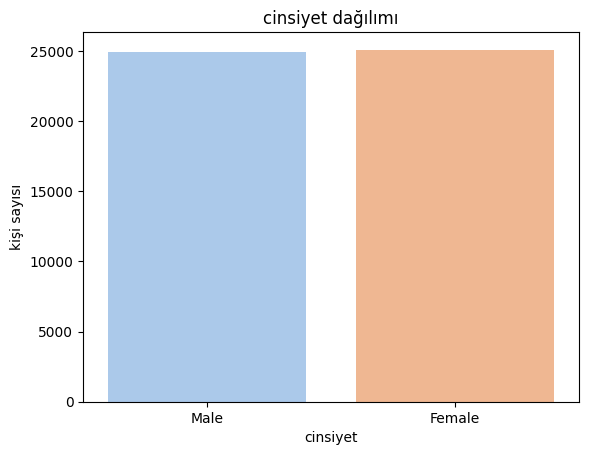

In [154]:
sns.countplot(x="gender", data=data, palette="pastel")
plt.title("cinsiyet dağılımı")
plt.xlabel("cinsiyet")
plt.ylabel("kişi sayısı")
plt.show()

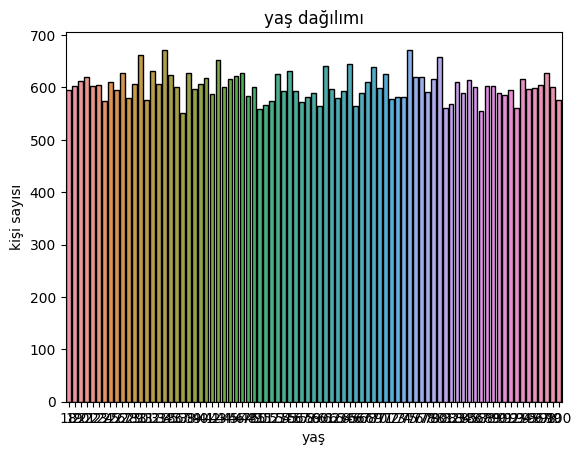

In [97]:
sns.countplot(x="age", data=data, edgecolor="black")
plt.title("yaş dağılımı")
plt.xlabel("yaş")
plt.ylabel("kişi sayısı")
plt.show()

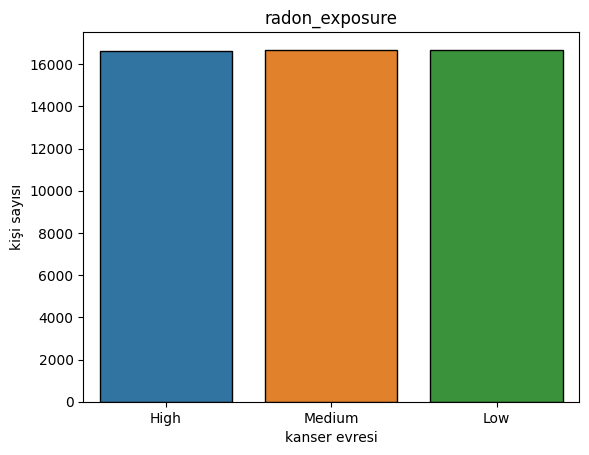

In [156]:
sns.countplot(x="radon_exposure", data=data, edgecolor="black")
plt.title("radon_exposure")
plt.xlabel("kanser evresi")
plt.ylabel("kişi sayısı")
plt.show()

**ENCODİNG**

In [149]:
print("encoding öncesi veri seti")
data.head()

encoding öncesi veri seti


,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,69,Male,66.025244,High,No,No,Yes,Moderate,No,No
1,100001,32,Female,12.780800,High,No,Yes,Yes,Moderate,Yes,Yes
2,100002,89,Female,0.408278,Medium,Yes,Yes,Yes,NaN,No,Yes
3,100003,78,Female,44.065232,Low,No,Yes,No,Moderate,No,Yes
4,100004,38,Female,44.432440,Medium,Yes,No,Yes,NaN,Yes,Yes


In [148]:
from sklearn.preprocessing import LabelEncoder

def labelEncoder():
    le=LabelEncoder()
    df=data.copy()
    df["gender"]=le.fit_transform(df["gender"])
    return df.head()

labelEncoder()

,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,69,1,66.025244,High,No,No,Yes,Moderate,No,No
1,100001,32,0,12.780800,High,No,Yes,Yes,Moderate,Yes,Yes
2,100002,89,0,0.408278,Medium,Yes,Yes,Yes,NaN,No,Yes
3,100003,78,0,44.065232,Low,No,Yes,No,Moderate,No,Yes
4,100004,38,0,44.432440,Medium,Yes,No,Yes,NaN,Yes,Yes


In [140]:
cols = [
    "age",
    "gender",
    "radon_exposure",
    "secondhand_smoke_exposure",
    "family_history",
    "lung_cancer"
]
df = data[cols].copy()

# 3️⃣ Gender sütununu 0/1'e çevir: Female = 0, Male = 1
df["gender"] = df["gender"].map({"Female": 0, "Male": 1})

# 4️⃣ radon_exposure encoding: Low = 0, Medium = 1, High = 2
df["radon_exposure"] = df["radon_exposure"].map({"Low": 0, "Medium": 1, "High": 2})

# 5️⃣ secondhand_smoke_exposure encoding: No = 0, Yes = 1
df["secondhand_smoke_exposure"] = df["secondhand_smoke_exposure"].map({"No": 0, "Yes": 1})

# 6️⃣ family_history encoding: No = 0, Yes = 1
df["family_history"] = df["family_history"].map({"No": 0, "Yes": 1})

# 7️⃣ lung_cancer encoding: No = 0, Yes = 1
df["lung_cancer"] = df["lung_cancer"].map({"No": 0, "Yes": 1})

df.head()

,age,gender,radon_exposure,secondhand_smoke_exposure,family_history,lung_cancer
0,69,1,2,0,0,0
1,32,0,2,1,1,1
2,89,0,1,1,0,1
3,78,0,0,1,0,1
4,38,0,1,0,1,1


In [102]:
# teşhis kategorisi label işlem göstergesi
le = LabelEncoder()
le.fit(df["radon_exposure"])  

print(le.classes_)  
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping) 


[0 1 2]
{0: 0, 1: 1, 2: 2}


In [103]:
X = df[["gender", "age", "secondhand_smoke_exposure", "radon_exposure"]]
Y = df[["lung_cancer"]]

print("X (özellikler) - ilk 5 satır:")
print(X.head())

print("\nY (hedef) - ilk 5 satır:")
print(Y.head())


X (özellikler) - ilk 5 satır:
   gender  age  secondhand_smoke_exposure  radon_exposure
0       1   69                          0               2
1       0   32                          1               2
2       0   89                          1               1
3       0   78                          1               0
4       0   38                          0               1

Y (hedef) - ilk 5 satır:
   lung_cancer
0            0
1            1
2            1
3            1
4            1


In [104]:
#min-max scaler optimizasyonu

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[:5])

[[1.         0.62195122 0.         1.        ]
 [0.         0.17073171 1.         1.        ]
 [0.         0.86585366 1.         0.5       ]
 [0.         0.73170732 1.         0.        ]
 [0.         0.24390244 0.         0.5       ]]


Test ve Train Ayırma

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [106]:
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier


In [111]:
models = [
    ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier()),
    ('SVM', SVC()),
    ('SGD', SGDClassifier()),
    ('RF', RandomForestClassifier())
]

print(type(models))

<class 'list'>


In [112]:
#modelden gelen spnuçların tutulduğu liste 
result=list()

print(type(result))

<class 'list'>


In [113]:
import warnings
warnings.filterwarnings("ignore")

**K-fold** 

makine öğrenmesinde cross-validation (çapraz doğrulama) yöntemlerinden biridir ve modelin performansını daha güvenilir ve genelleştirilmiş bir şekilde ölçmek için kullanılır.

In [118]:
from sklearn.model_selection import KFold, cross_val_score

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X_scaled, y.values.ravel(), cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    names.append(name)
    
    print(f"{name}: {cv_results.mean():.4f}")


LR: 0.6855
KNN: 0.6372
DT: 0.6828
SVM: 0.6873
SGD: 0.6873
RF: 0.6832


In [123]:
rfc = RandomForestClassifier(n_estimators=100, random_state=5)
rfc.fit(X_train,Y_train)

print("score=", rfc.score(X_test,Y_test))

score= 0.6865


**Confusion Matrix**

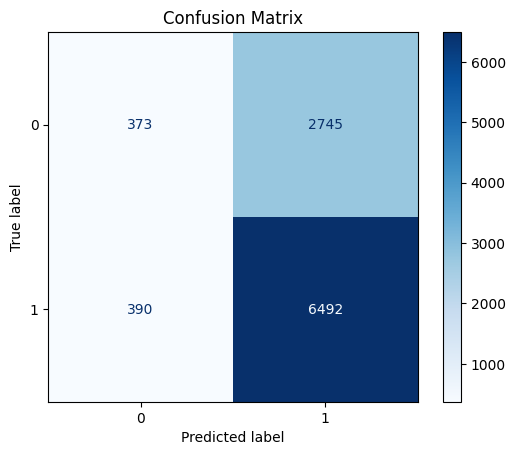

Classification Report:

              precision    recall  f1-score   support

           0       0.49      0.12      0.19      3118
           1       0.70      0.94      0.81      6882

    accuracy                           0.69     10000
   macro avg       0.60      0.53      0.50     10000
weighted avg       0.64      0.69      0.61     10000



In [134]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Y_predict = rfc.predict(X_test)

cm = confusion_matrix(Y_test.values.ravel(), Y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # 0 ve 1 sınıfları
disp.plot(cmap='Blues')  # cmap sözlüğü doğru şekilde

plt.title("Confusion Matrix")
plt.show()
print("Classification Report:\n")
print(classification_report(Y_test.values.ravel(), y_pred))


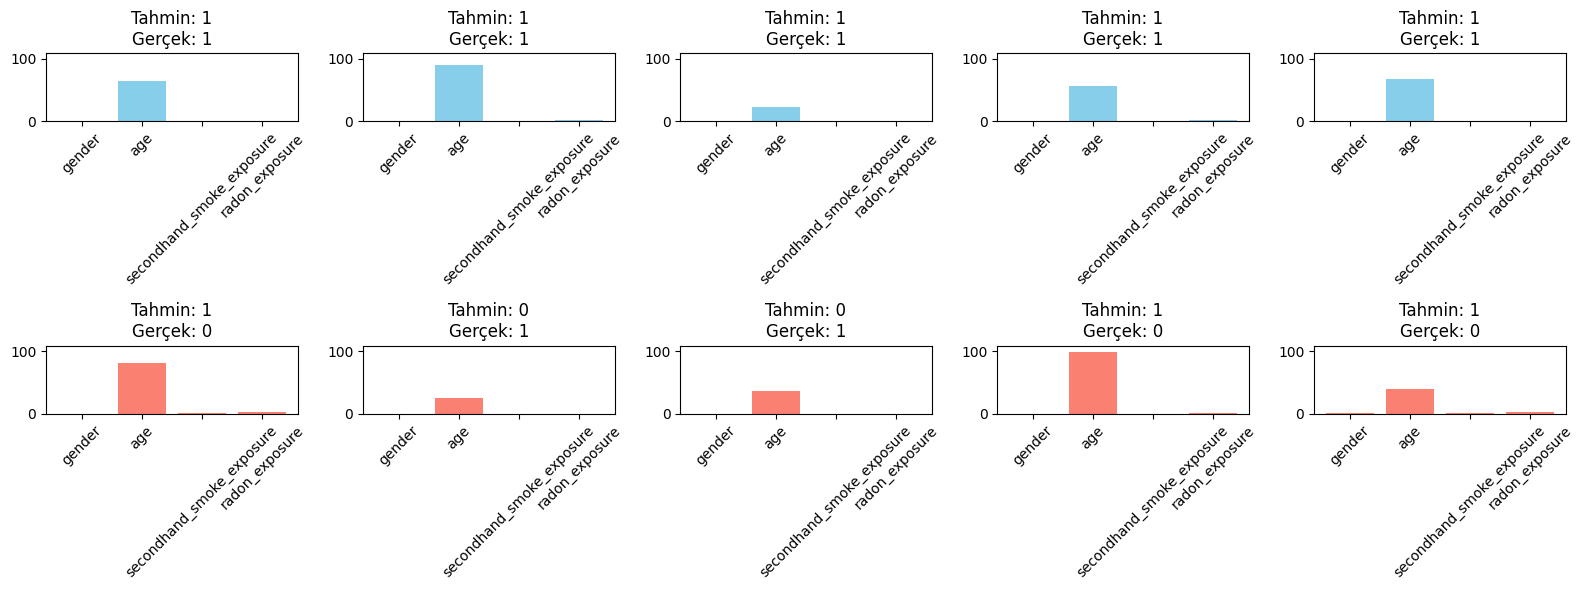

In [144]:
import random

# Kaç örnek görselleştirilecek
num_samples = 10

# Test setinden rastgele indeksler seç
random_indices = np.random.choice(len(X_test), size=num_samples, replace=False)

# Rastgele örnekleri al
X_sample = X_test.iloc[random_indices]
y_true = Y_test.iloc[random_indices].values.ravel()

# Model tahminleri
y_pred = rfc.predict(X_sample)

# Doğru ve yanlış tahminlerin indeksleri
correct_indices = np.where(y_pred == y_true)[0]
incorrect_indices = np.where(y_pred != y_true)[0]

plt.figure(figsize=(16, 6))

# Doğru tahmin örnekleri
for i, idx in enumerate(correct_indices[:num_samples//2]):
    plt.subplot(2, num_samples//2, i+1)
    data_row = X_sample.iloc[idx]
    plt.bar(data_row.index, data_row.values, color='skyblue')
    plt.title(f"Tahmin: {y_pred[idx]}\nGerçek: {y_true[idx]}")
    plt.xticks(rotation=45)
    plt.ylim(0, max(X_sample.max())*1.1)

# Yanlış tahmin örnekleri
for i, idx in enumerate(incorrect_indices[:num_samples//2]):
    plt.subplot(2, num_samples//2, i+1 + num_samples//2)
    data_row = X_sample.iloc[idx]
    plt.bar(data_row.index, data_row.values, color='salmon')
    plt.title(f"Tahmin: {y_pred[idx]}\nGerçek: {y_true[idx]}")
    plt.xticks(rotation=45)
    plt.ylim(0, max(X_sample.max())*1.1)

plt.tight_layout()
plt.show()


In [157]:
# 5. satırı seç (index 4)
sample_row = X.iloc[[4]]  # çift köşeli parantez -> DataFrame formatı

# Model tahmini
pred_class = rfc.predict(sample_row)[0]

# Tahmin olasılıkları (0 ve 1 için)
pred_prob = rfc.predict_proba(sample_row)[0]

# Sonuçları yazdır
print(f"5. satır için özellikler:\n{sample_row}\n")
print(f"Tahmin edilen sınıf (Lung Cancer): {pred_class}")
print(f"Tahmin olasılıkları -> 0: {pred_prob[0]:.4f}, 1: {pred_prob[1]:.4f}")

# Gerçek sınıfı göstermek için
actual_class = Y.iloc[4,0]
print(f"Gerçek sınıf: {actual_class}")


5. satır için özellikler:
   gender  age  secondhand_smoke_exposure  radon_exposure
4       0   38                          0               1

Tahmin edilen sınıf (Lung Cancer): 1
Tahmin olasılıkları -> 0: 0.4207, 1: 0.5793
Gerçek sınıf: 1


Random Sample Predictions vs Actual:

   Index  Actual  Predicted
0  23053       1          1
1  17758       1          1
2   9899       0          0
3   3611       0          1
4   8643       0          1


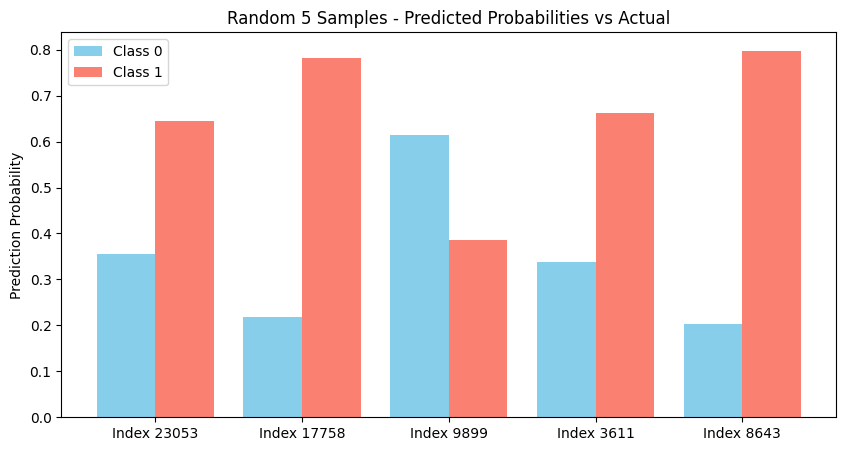

In [153]:
import numpy as np
import pandas as pd

# Kaç rastgele satır seçilecek
num_samples = 5

# Rastgele indeksler seç
random_indices = np.random.choice(len(X), size=num_samples, replace=False)

# Örnekleri al
X_sample = X.iloc[random_indices]
y_actual = Y.iloc[random_indices, 0].values  # Gerçek sınıflar

# Tahminler
y_pred = rfc.predict(X_sample)
y_prob = rfc.predict_proba(X_sample)

# Sonuçları DataFrame olarak göster
results_df = pd.DataFrame({
    'Index': random_indices,
    'Actual': y_actual,
    'Predicted': y_pred,
   })

print("Random Sample Predictions vs Actual:\n")
print(results_df)

# İsteğe bağlı: bar plot ile görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
for i, idx in enumerate(random_indices):
    plt.bar(i-0.2, y_prob[i,0], width=0.4, color='skyblue', label='Class 0' if i==0 else "")
    plt.bar(i+0.2, y_prob[i,1], width=0.4, color='salmon', label='Class 1' if i==0 else "")

plt.xticks(range(num_samples), [f"Index {idx}" for idx in random_indices])
plt.ylabel("Prediction Probability")
plt.title("Random 5 Samples - Predicted Probabilities vs Actual")
plt.legend()
plt.show()
